# Predicting Customer Churn using  Logistic regression

Here we'll create a model for a telecommunication company using Logistic regression, to predict when its customers will leave for a competitor, so that they can take some action to retain the customers.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset
df1=pd.read_csv("G:\Data science\Datasets\ChurnData.csv")
df1.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
df1.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

The dataset includes information about:

    1.Customers who left within the last month – the column is called Churn.
    2.Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
    3.Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
    4.Demographic info about customers – gender, age range, and if they have partners and dependents

In [4]:
#cleaning data
df=df1[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
df['churn']=df['churn'].astype('int')
df.head()

C:\Users\Happy\AppData\Local\Temp\ipykernel_21428\3813046934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn']=df['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [5]:
#general information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    int32  
dtypes: float64(9), int32(1)
memory usage: 15.0 KB


In [6]:
#statistical analysis
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,1.000000


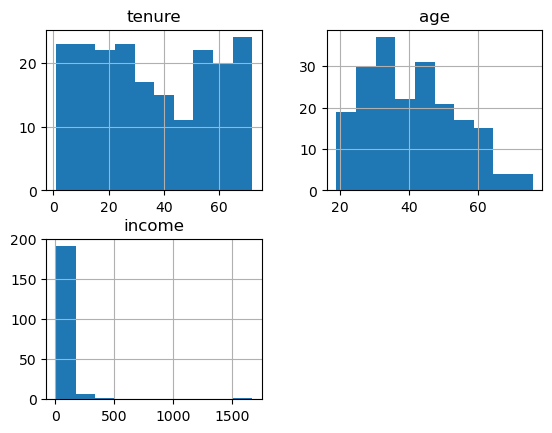

In [7]:
df[['tenure','age','income']].hist();

In [8]:
pd.cut(df['age'],bins=3).value_counts(normalize=True)*100

(18.943, 38.0]    47.0
(38.0, 57.0]      40.0
(57.0, 76.0]      13.0
Name: age, dtype: float64

In [9]:
pd.cut(df['tenure'],bins=4).value_counts(normalize=True)*100

(0.929, 18.75]    29.5
(54.25, 72.0]     26.0
(18.75, 36.5]     24.5
(36.5, 54.25]     20.0
Name: tenure, dtype: float64

    Key Findings:
    1.Most of the customers are young (18-38) followed by middle aged (38-57) and elderly (57-76).
    2.More than quarter (29.5%) of the companys customers are from last 19 years.
    3.Average income of the customer is 75 units.
    4.Average age of the customer is 41

## Logistic regression

In [10]:
#preprocessing data
x=np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
x[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [11]:
y=np.asarray(df['churn'])

In [12]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [13]:
#train test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [14]:
#modeling
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression(C=0.01,solver='liblinear').fit(x_train,y_train)

In [15]:
#prediction
y_hat=logi.predict(x_test)

In [16]:
y_hatprob=logi.predict_proba(x_test)

In [17]:
#evaluation
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_hat,pos_label=0)

0.7058823529411765

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_hat,labels=[1,0])

array([[ 6,  9],
       [ 1, 24]], dtype=int64)

Let's look at first row. The first row is for customers whose actual churn value in the test set is 1. Here out of 40 customers, the churn value of 15 of them is 1. Out of these 15 cases, the classifier correctly predicted 6 of them as 1, and 9 of them as 0.

This means, for 6 customers, the actual churn value was 1 in test set and classifier also correctly predicted those as 1. However, while the actual label of 9 customers was 1, the classifier predicted those as 0, which is not very good. We can consider it as the error of the model for first row.

Lets look at the second row. It looks like there were 25 customers whom their churn value were 0.

The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0.

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

The average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

In [20]:
from sklearn.metrics import log_loss
log_loss(y_test,y_hatprob)

0.6017092478101187

Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

### Test case

Lets consider a customer A with tenure=35,ag=41,address=11,income=75,ed=3,employ=10,equip=1 and predict what will be the customers course of action.

In [22]:
A=[[35,41,11,75,3,10,1]]
pred=logi.predict(A)

In [23]:
pred

array([0])

Our model predicted that the customer A with above parameters will most likely will leave for a competitor.